In [1]:
# This dataset is on Employee churn and in this data set we have to find out or predict:-
# The Employee quits the service or not .
# And the find the turn over of the employee
# So the target over here is 'quit' column

In [2]:
# install the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
# first load the dataset  employee_data.csv
df=pd.read_csv('employee_data.csv')
df.head()
#df =pd.read_csv(r"path") r: means carriage return
#to show first five records from dataset:- df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [4]:
# check null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

<AxesSubplot:>

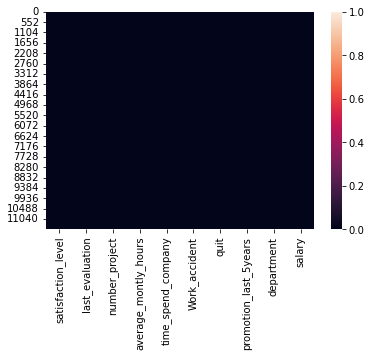

In [5]:
# check null with visualize
sb.heatmap(df.isnull())

In [6]:
df.shape

(11582, 10)

In [7]:
# handle null values
df['promotion_last_5years'].unique()

array([ 0.,  1., nan])

In [8]:
# check the value counts of promotion_last_5years
df['promotion_last_5years'].value_counts()

0.0    11421
1.0      160
Name: promotion_last_5years, dtype: int64

In [9]:
# replace the value of null in promotion_last_5years col with the max no. of value
df['promotion_last_5years'].fillna(0.0,inplace=True)

In [10]:
# check the value counts of promotion_last_5years
df['promotion_last_5years'].value_counts()

0.0    11422
1.0      160
Name: promotion_last_5years, dtype: int64

In [11]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object)

In [12]:
df['department'].value_counts()

sales          3092
technical      2227
support        1790
IT              935
RandD           689
product_mng     638
marketing       633
accounting      611
hr              601
management      365
Name: department, dtype: int64

In [13]:
# replace the value of null in promotion_last_5years col with the max no. of value
df['department'].fillna('sales',inplace=True)

In [14]:
df['salary'].unique()

array(['low', 'medium', 'high', nan], dtype=object)

In [15]:
df['salary'].value_counts()

low       5583
medium    5097
high       901
Name: salary, dtype: int64

In [16]:
# replace the value of null in promotion_last_5years col with the max no. of value
df['salary'].fillna('low',inplace=True)

In [17]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [18]:
# check duplicate value
df.duplicated().sum()

9

In [19]:
# drop duplicates col 
df.drop_duplicates(inplace=True)

In [20]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [21]:
# seperate the string and int object types
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes([int,float])

In [22]:
df_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0.0
1,0.80,0.86,5,262,6,0,1,0.0
2,0.11,0.88,7,272,4,0,1,0.0
3,0.72,0.87,5,223,5,0,1,0.0
4,0.37,0.52,2,159,3,0,1,0.0


In [23]:
df_cat.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [24]:
# Apply LabelEncoder on df_cat dataframe
from sklearn.preprocessing import LabelEncoder

In [25]:
for col in df_cat:
    # create an object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [26]:
# Join both df_cat and df_num in one col with new name 
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,department,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
0,7,1,0.38,0.53,2,157,3,0,1,0.0
1,7,2,0.80,0.86,5,262,6,0,1,0.0
2,7,2,0.11,0.88,7,272,4,0,1,0.0
3,7,1,0.72,0.87,5,223,5,0,1,0.0
4,7,1,0.37,0.52,2,159,3,0,1,0.0


In [27]:
# check the data in outp-ut col is balance or not
df_new['quit'].value_counts()

0    9582
1    1991
Name: quit, dtype: int64

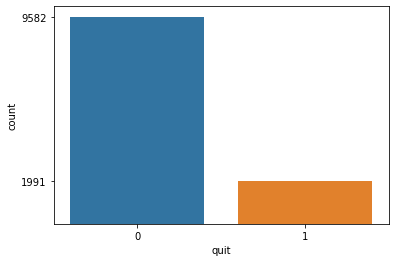

In [28]:
# Visualization
sb.countplot(data=df,x='quit')
f=df['quit'].value_counts()
plt.yticks(f)
plt.show()

In [29]:
# we can clearly see that the data here is un-balanced 
# so we have to balance it

In [30]:
# install the library to balance the data
#!pip install imblearn

In [31]:
# select input and output column
x=df_new.drop('quit',axis=1) # selected input
y=df_new['quit']# selected output 

In [32]:
# train_test_split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [33]:
# Apply StandardScaler on the x_train_ros,x_test-ros
from sklearn.preprocessing  import StandardScaler

# create an object of StandardScaler class
ss=StandardScaler()

x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [34]:
x_train.shape

(8101, 9)

In [35]:
# to balance the data call the RandomOverSampler package
# sampling tech
from imblearn.over_sampling import RandomOverSampler

In [36]:
# create an object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [37]:
# apply RandomOverSampler on x_train and y_train
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [38]:
y_train_ros.value_counts()

1    6738
0    6738
Name: quit, dtype: int64

In [39]:
x_train_ros.shape,y_train_ros.shape

((13476, 9), (13476,))

In [40]:
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [41]:
y_test_ros.value_counts()

0    2844
1    2844
Name: quit, dtype: int64

In [42]:
# now the data is balanced

In [43]:
# Create function  

def create_model(model):
    # train the model 
    model.fit(x_train_ros,y_train_ros)
    # test the model 
    y_pred=model.predict(x_test_ros)
    # generate report
    print(classification_report(y_test_ros,y_pred))
    print(confusion_matrix(y_test_ros,y_pred))
    return model

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
# perform on the model with LogisticRegression
from sklearn.linear_model import LogisticRegression

In [46]:
# create an object of LogisticRegression class
lr=LogisticRegression()

In [47]:
# call the function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2844
           1       0.78      0.79      0.79      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2213  631]
 [ 596 2248]]


In [48]:
# AS we can see that the result here is good but it can get better 

In [49]:
x.columns

Index(['department', 'salary', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'],
      dtype='object')

# Decision Tree

In [50]:
# check the model with the help of DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [51]:
# create a object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) # bydefault Gini index

In [52]:
# call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2777   67]
 [ 217 2627]]


In [53]:
# Decision tree :- recall function :- for 0=98% and 1=92%

In [54]:
# To see the imp features create a dictionary 
dict={'Input columns':x.columns,'IG':dt.feature_importances_}
# convert the dict in to Dataframe
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input columns,IG
0,satisfaction_level,0.438336
1,time_spend_company,0.336079
2,last_evaluation,0.104326
3,average_montly_hours,0.067297
4,number_project,0.033786
5,department,0.016829
6,Work_accident,0.002275
7,salary,0.001072
8,promotion_last_5years,0.000000


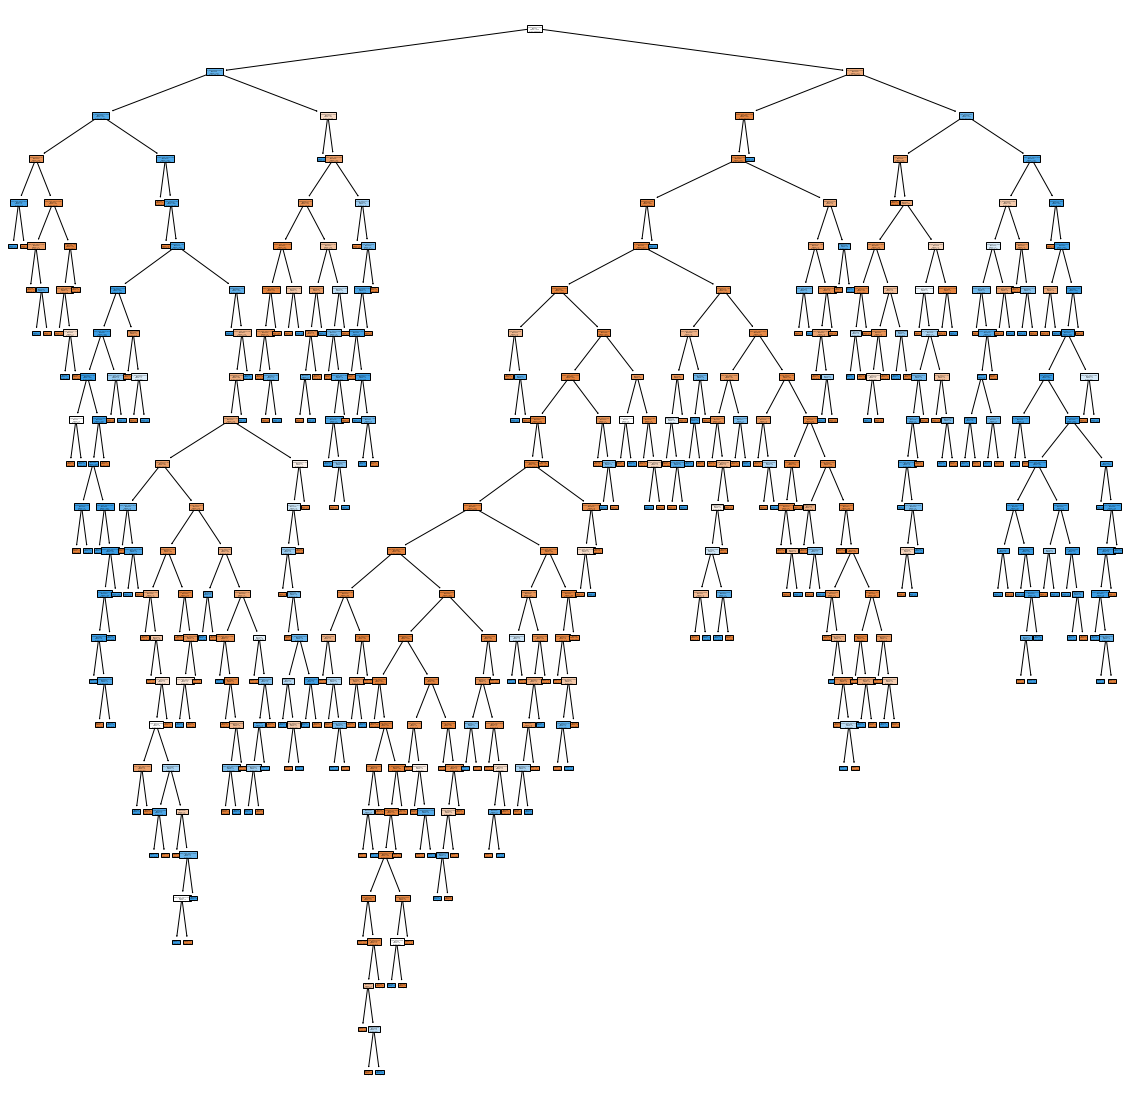

In [55]:
# create a tree diagram 
from sklearn import tree
feature=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=feature,filled=True)

# max_depth(Gini Index)

In [56]:
# create a object of decisionTree and pass the max_depth parameter
dt1=DecisionTreeClassifier(random_state=1,max_depth=5)
'''for i in range(1,9):
    # create an object of the decision tree
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('max_depth',i)'''
    # call model
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2844
           1       0.93      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2643  201]
 [ 179 2665]]


In [57]:
# Decision tree max_depth:- recall function :- for 0=93% and 1=94%

In [58]:
# create a dictionary to see important features
dict={'input columns':x.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,input columns,IG
0,satisfaction_level,0.446917
1,time_spend_company,0.411483
2,last_evaluation,0.081922
3,average_montly_hours,0.043199
4,number_project,0.014962
5,department,0.001517
6,salary,0.000000
7,Work_accident,0.000000
8,promotion_last_5years,0.000000


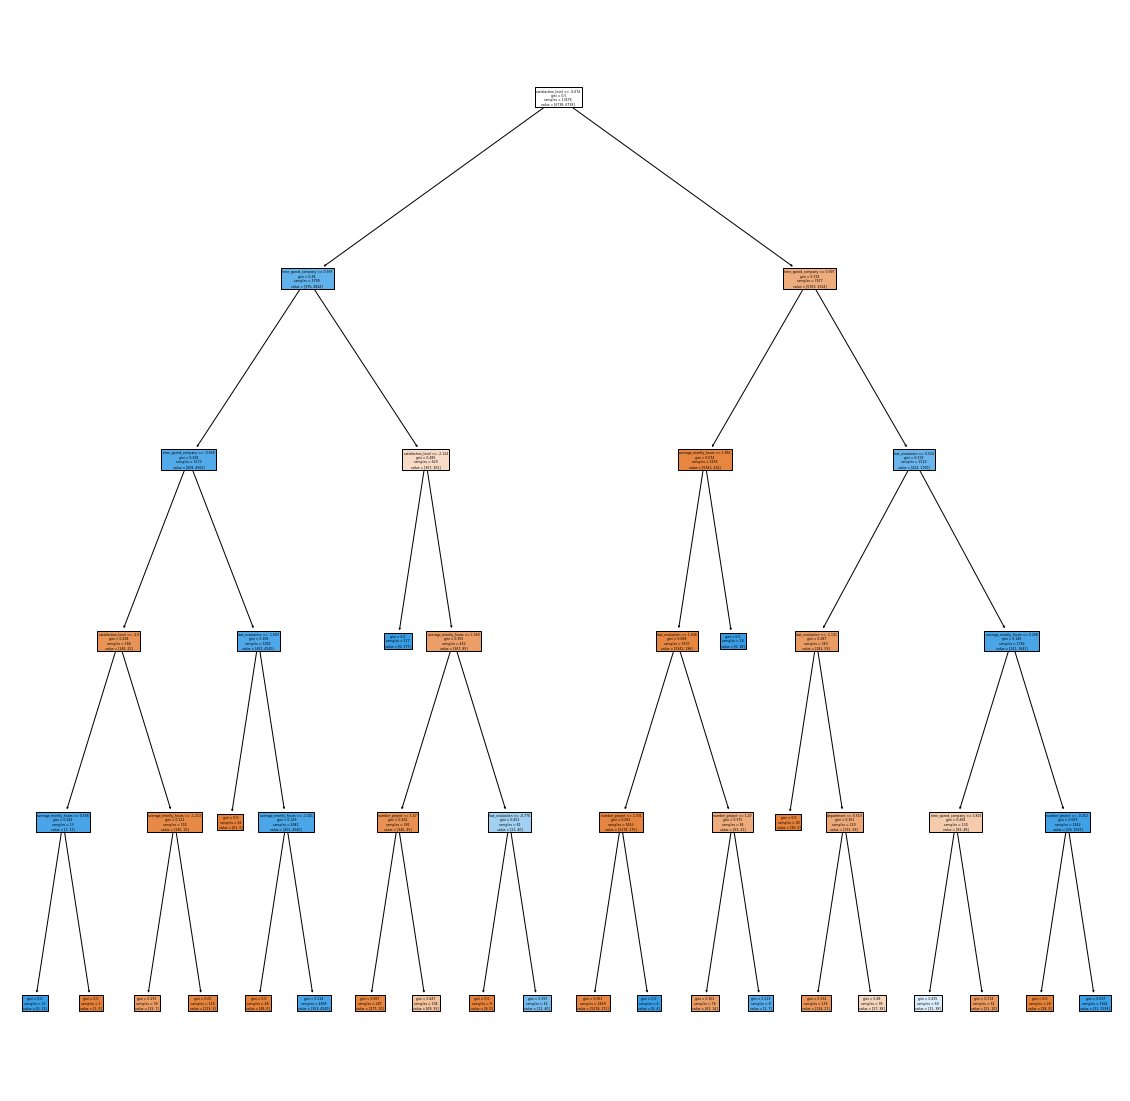

In [59]:
# draw a tree
from sklearn import tree
feature=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=feature,filled=True)

#  min_samples_leaf(Gini index)

In [60]:
# create a object of decisionTree and pass the min_samples_leaf parameter
dt2=DecisionTreeClassifier(min_samples_leaf=47,random_state=1)

'''for i in range(45,101):
    # create a object of decisionTree and pass the min_leaf_samples parameter
    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    print('min_samples_leaf',i)'''
    # call function 
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.93      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2778   66]
 [ 200 2644]]


In [61]:
# decision Tree min_sample_leaf:- recall :- for 0=98% and 1=93%

In [62]:
# create a dictionary to see important features
dict={'input columns':x.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,input columns,IG
0,satisfaction_level,0.474355
1,time_spend_company,0.381802
2,last_evaluation,0.088029
3,average_montly_hours,0.041919
4,number_project,0.011735
5,department,0.001881
6,salary,0.000279
7,Work_accident,0.000000
8,promotion_last_5years,0.000000


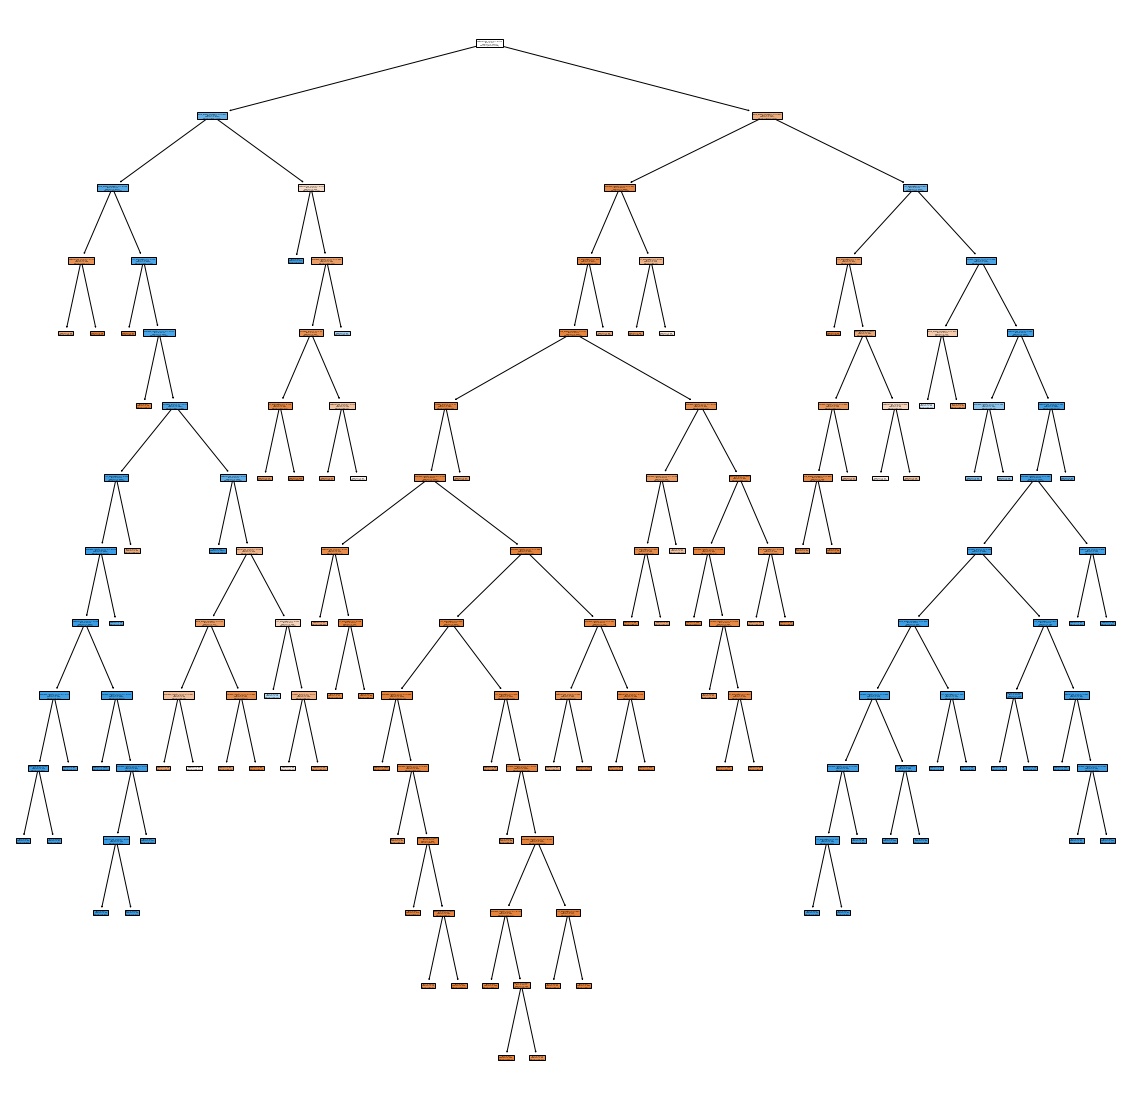

In [63]:
# Draw tree diagram
from sklearn import tree
feature=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=feature,filled=True)

# Entropy

In [64]:
# create a object of DecisionTree Classifier by passing Entropy (without pruning technique)
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
# call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2797   47]
 [ 222 2622]]


# Max_depth(Entropy)

In [65]:
# create a object of DecisionTree Classifier by passing Entropy with max_depth
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=1)

'''for i in range(1,9):
    dt1=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=1)
    print('max_depth(entropy)',i)'''
    # call function 
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2844
           1       0.98      0.93      0.95      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2800   44]
 [ 208 2636]]


# Min_samples_leaf(entropy)

In [66]:
# create a object of DecisionTree Classifier by passing Entropy with max_depth
dt2=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=45,random_state=1)

'''for i in range(45,100):
    dt2=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i,random_state=1)
    print('Entropy(min_samples_leaf)',i)'''
    # call model 
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2844
           1       0.97      0.94      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2752   92]
 [ 184 2660]]


# Ensembling Technique

In [67]:
# Apply Ensembling technique :- RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Apply Ensembling(RandomForestClassifier) on Gini index

# create object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,random_state=1,max_features=2)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
# Max_features means no of inputs
'''
for i in range(1,11):
    rfc=RandomForestClassifier(n_estimators=10,random_state=1,max_features=i)
    print('rfc',i)'''
# call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2844
           1       0.99      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2830   14]
 [ 217 2627]]


In [69]:
# Apply Ensembling RandomForestClassifier witk the help of 'entropy'

# create object of RandomForestClassifier class
rfc1=RandomForestClassifier(n_estimators=10,random_state=1,criterion='entropy',max_features=2)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
# max_features means no of inputs
'''for i in range(1,11):
    rfc1=RandomForestClassifier(n_estimators=10,random_state=1,criterion='entropy',max_features=i)
    print('rfc1',i)'''
    # call function
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2844
           1       0.99      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2829   15]
 [ 220 2624]]


# ADA Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
# create object of AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=6,random_state=1)

'''for i in range(1,11):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)'''
# call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2606  238]
 [ 181 2663]]


# Gradient Boost

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
# create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)'''
# call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2611  233]
 [ 182 2662]]


# Extreme Gradient Boosting 

In [74]:
# call the xgb package
from xgboost import XGBClassifier

In [75]:
# create object of xgb classifier
xgc=XGBClassifier(n_estimators=2,reg_alpha=1,random_state=1)
#automatic overftting : reg means regualrization  and alpha or lambda:
#hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100

'''for i in range(1,101):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('xgc',i)'''
    # call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2844
           1       0.94      0.94      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2662  182]
 [ 178 2666]]


In [76]:
# extreme gradient function :- recall :- for 0=94% and 1=94%

# Support Vector Machine

In [77]:
# call the SVM package
from sklearn.svm import LinearSVC

In [78]:
# create object of LinearSVC class
svc=LinearSVC(random_state=1)  # hard margin

# call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [79]:
# Now the model is underfit so we add external error 
# create a object of LinearSVC class with external error 
svc1=LinearSVC(random_state=1,C=0.9)
# added some error on training time with the help of C
# call model
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [80]:
# Here there is no effect on recall even if error increase or decrease.
# so we concluded that the data is not a linearly separatable means the data is non-linear 
# then we use polynomial kernal function .It is used for non-linearly data .

# Ploynomial kernal

In [81]:
# Ploynomial kernal
from sklearn.svm import SVC
# SVC is a inbuilt class for non-linearly data 

In [82]:
# create object of SVC class(for polynomial)
svc2=SVC(random_state=1,kernel="poly")

# call function
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2844
           1       0.95      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2714  130]
 [ 203 2641]]


In [83]:
# Radial basis kernal function
svc3=SVC(random_state=1,kernel='rbf')

# call function
svc3=create_model(svc3)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2732  112]
 [ 209 2635]]


In [84]:
# In this radialkernal function domain :- recall :- 0=95% and 1=93%
# In Polynomial kernal function :- recall :- 0=96% and 1=93%
# so we select Polynomial kernal function 

# KNN Algorithm

In [85]:
# Selecting important features with output in x,y 
#0 satisfaction_level	0.438336
#1	time_spend_company	0.336079
#2	last_evaluation	0.104326
x=df[['satisfaction_level','time_spend_company','last_evaluation']]
y=df['quit']

In [86]:
# spliting the data of x and y using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
#first apply standardscaler
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
# create object of KNeighborsClassifier class
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [90]:
# call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2844
           1       0.93      0.93      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2649  195]
 [ 208 2636]]


# Conclusion:-
# to see what is thye training and testing score of all the Algo we have performed

In [91]:
# LogisticRegression the score for 0=78% and for 1=79%
# DecisionTreeClassifier Gini index the score we got for 0=98% and 1=92%
    # DecisionTreeClassifier(max_depth(Gini index)) we got the score of for 0=93% and 1=94%
    # DecisionTreeClassifier(min_samples_leaf(Gini index)) we got the score for 0=98% and 1=93%
# DecisionTreeClassifier(Entropy) we got the score for 0=98% and 1=92%
    # Entropy(max_depth) we got the score for 0=98% and for 1=93%
    # Entopy(min_samples_leaf) we got tyhe score for 0=97% and for 1=94%
# Ensembling Technique(Gini index) we have the score of 0=100% and 1=92%
# Ensembling technque(Entropy) we have the score for 0=99% and 1=92%
# AdaBoosting techinique we have received the score for 0=92% and 1=94%
# Gradient Boosting we have the result :- recall :- 0=92% and 1=94%
# extreme gradient function :- recall :- for 0=94% and 1=94%
# SVC(linear) :- recall :- 0=77% and 1=78%
   # SVC(external error) :- recall:- 0=77% and 1=78%
# In this radialkernal function domain :- recall :- 0=95% and 1=93%
# In Polynomial kernal function :- recall :- 0=96% and 1=93%
# so we select Polynomial kernal function 
# Here in KNN Algorithm in this domain we get at n_neighbors=5 for :- recall:- for 0=93% and 1=93%